In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Read the image

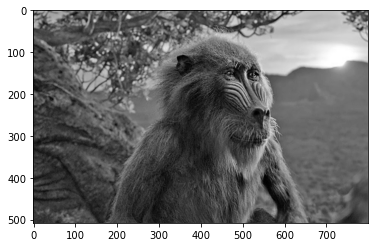

In [13]:
image_list=["test_im_1.png","test_im_2.png","einstein.png","rafiki.jpg"]
#Change the array value to see other picture 0-3
image = cv2.imread(image_list[3], 0)

biggerImage = np.zeros((image.shape[0]+2, image.shape[1]+2))
plt.figure()
plt.imshow(image, cmap='gray')
plt.show()

for i in range(1, image.shape[0]-1):
    for j in range(1, image.shape[1]-1):
        biggerImage[i][j] = image[i-1][j-1]

In [3]:
#Kernels
prewitt = np.array([
    [-1, 0, 1],
    [-1,  0, 1],
    [-1, 0, 1]
])

prewitt2 = np.array([
    [-1, -1, -1],
    [0,  0, 0],
    [1, 1, 1]
])

sobel = np.array([
    [-1, 0, 1],
    [-2,  0, 2],
    [-1, 0, 1]
])

sobel2 = np.array([
    [-1, -2, -1],
    [0,  0, 0],
    [1, 2, 1]
])

f5 = np.array([
    [-1, -1, 0],
    [-1,  0, 1],
    [0, 1, 1]
])
if5 = np.array([
    [1, 1, 0],
    [1,  0, -1],
    [0, -1, -1]
])
f51 = np.array([
    [0, -1, -1],
    [1,  0, -1],
    [1, 1, 0]
])
if51 = np.array([
    [0, 1, 1],
    [-1,  0, 1],
    [-1, -1, 0]
])

eke=     np.array([
    [0, 0, 0],
    [0,  0, 1],
    [0, 1, 0]
])

Calculate Target Size

In [4]:

def targetSize(N, kernel_N):
    pixels = 0

    for i in range(N):
        aux = i + kernel_N
        if aux <= N: pixels += 1
            
    return pixels

Apply the formula
$$F\circ I(x,y) = \sum_{j=-N}^N \sum_{i=-N}^N F(i,j) I(x+1, y+1)$$

In [37]:
def convolve(img, kernel):
    k = kernel.shape[0]
    xSize = targetSize(img.shape[0], k)
    ySize = targetSize(img.shape[1], k)
    

    convolved = np.zeros(shape=(xSize, ySize))
    
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            
            mat = img[i-1:i+2, j-1:j+2]
            convolved[i-1, j-1] = np.sum(np.multiply(mat, kernel))
            
    return convolved

In [6]:
#Get the new images using different kernerls
vertical2 = convolve(biggerImage, sobel)
hori = convolve(biggerImage, prewitt2)
vertical1 = convolve(biggerImage, prewitt)
hori2= convolve(biggerImage, sobel2)
f55=convolve(biggerImage, f5)
if55=convolve(biggerImage, if5)
f5i=convolve(biggerImage, f51)
if5i=convolve(biggerImage, if51)

Show results

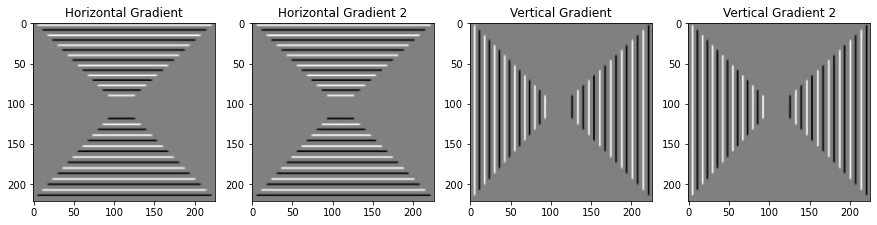

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.imshow(hori, cmap='gray')
plt.title('Horizontal Gradient')
plt.subplot(1,4,2)
plt.imshow(hori2, cmap='gray')
plt.title('Horizontal Gradient 2')
plt.subplot(1,4,3)
plt.imshow(vertical1, cmap='gray')
plt.title('Vertical Gradient')
plt.subplot(1,4,4)
plt.title('Vertical Gradient 2')
plt.imshow(vertical2, cmap='gray')
plt.show()

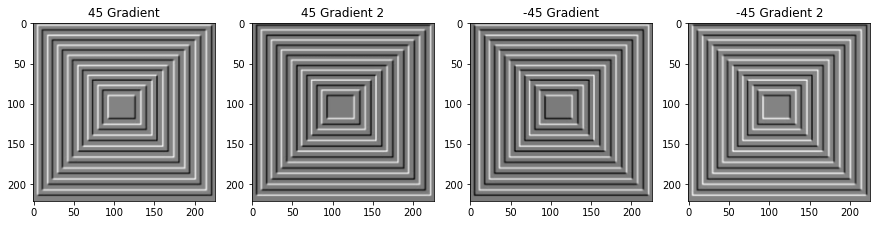

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.imshow(f55, cmap='gray')
plt.title('45 Gradient')
plt.subplot(1,4,2)
plt.imshow(if55, cmap='gray')
plt.title('45 Gradient 2')
plt.subplot(1,4,3)
plt.imshow(f5i, cmap='gray')
plt.title('-45 Gradient')
plt.subplot(1,4,4)
plt.title('-45 Gradient 2')
plt.imshow(if5i, cmap='gray')
plt.show()

## Rafael Andrade , José Luis Lobera and José Miguel de la Mora

In [45]:
test = convolve(biggerImage, eke)

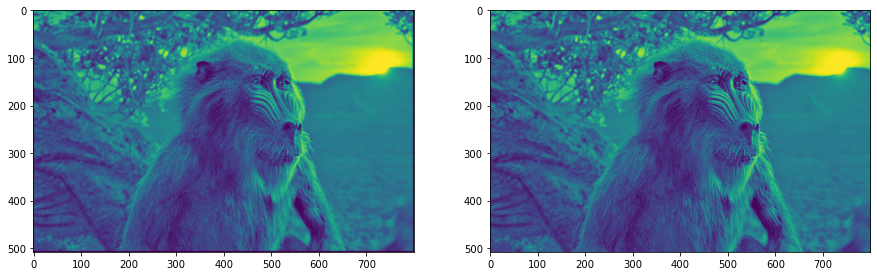

In [46]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(test)
plt.subplot(1,2,2)
plt.imshow(image)
plt.show()

In [43]:
test[0,0]

246.0

In [41]:
image[0,1]

114

In [42]:
image[1,0]

132